# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
units = "imperial"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | acarau
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | callao
Processing Record 4 of Set 1 | preobrazheniye
Processing Record 5 of Set 1 | dunedin
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | kuala kangsar
Processing Record 8 of Set 1 | erenhot
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | camarinas
Processing Record 11 of Set 1 | atafu village
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | nema
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | nizhniy kuranakh
Processing Record 16 of Set 1 | st. john's
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | kil'mez'
City not found. Skipping...
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | olonkinbyen
Processing Record 21 of Set 1 | sikasso
Processing Record 22 of Set 1 | levuka
P

Processing Record 40 of Set 4 | mbanza-ngungu
Processing Record 41 of Set 4 | saint joseph
Processing Record 42 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 43 of Set 4 | kota belud
Processing Record 44 of Set 4 | macapa
Processing Record 45 of Set 4 | sao gabriel da cachoeira
Processing Record 46 of Set 4 | hithadhoo
Processing Record 47 of Set 4 | el jadid
Processing Record 48 of Set 4 | bangassou
Processing Record 49 of Set 4 | odder
Processing Record 0 of Set 5 | porbandar
Processing Record 1 of Set 5 | luderitz
Processing Record 2 of Set 5 | pisco
Processing Record 3 of Set 5 | gelibolu
Processing Record 4 of Set 5 | paris
Processing Record 5 of Set 5 | palmas
Processing Record 6 of Set 5 | lihue
Processing Record 7 of Set 5 | cockburn town
Processing Record 8 of Set 5 | veinticinco de mayo
Processing Record 9 of Set 5 | shasta lake
Processing Record 10 of Set 5 | cabedelo
Processing Record 11 of Set 5 | wawa
Processing Record 12 of Set 5 | westport
Processin

Processing Record 29 of Set 8 | serowe
Processing Record 30 of Set 8 | saipan
Processing Record 31 of Set 8 | new norfolk
Processing Record 32 of Set 8 | dubna
Processing Record 33 of Set 8 | pariaman
Processing Record 34 of Set 8 | chibougamau
Processing Record 35 of Set 8 | fannuj
City not found. Skipping...
Processing Record 36 of Set 8 | mindelo
Processing Record 37 of Set 8 | reef al fujairah city
City not found. Skipping...
Processing Record 38 of Set 8 | portland
Processing Record 39 of Set 8 | porto novo
Processing Record 40 of Set 8 | san giovanni in fiore
Processing Record 41 of Set 8 | tucuma
Processing Record 42 of Set 8 | rexburg
Processing Record 43 of Set 8 | dilijan
Processing Record 44 of Set 8 | diego de almagro
Processing Record 45 of Set 8 | olgii
City not found. Skipping...
Processing Record 46 of Set 8 | lodja
Processing Record 47 of Set 8 | bodo
Processing Record 48 of Set 8 | touros
Processing Record 49 of Set 8 | georgetown
Processing Record 0 of Set 9 | ilhabe

Processing Record 16 of Set 12 | fale old settlement
Processing Record 17 of Set 12 | emerald
Processing Record 18 of Set 12 | ujae
Processing Record 19 of Set 12 | nuea khlong
Processing Record 20 of Set 12 | aoulef
Processing Record 21 of Set 12 | crane
Processing Record 22 of Set 12 | carnarvon
Processing Record 23 of Set 12 | castillos
Processing Record 24 of Set 12 | weligama
Processing Record 25 of Set 12 | mugia
Processing Record 26 of Set 12 | bikenibeu village
Processing Record 27 of Set 12 | manaure
Processing Record 28 of Set 12 | petropavlovsk-kamchatsky
Processing Record 29 of Set 12 | tobelo
Processing Record 30 of Set 12 | bad tolz
Processing Record 31 of Set 12 | tofol
Processing Record 32 of Set 12 | bechar
Processing Record 33 of Set 12 | kununurra
Processing Record 34 of Set 12 | vuokatti
Processing Record 35 of Set 12 | ariquemes
Processing Record 36 of Set 12 | myskhako
Processing Record 37 of Set 12 | louga
Processing Record 38 of Set 12 | aylmer
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,acarau,-2.8856,-40.1200,82.04,80,93,14.81,BR,1706493668
1,ushuaia,-54.8000,-68.3000,58.66,51,20,12.66,AR,1706493669
2,callao,-12.0667,-77.1500,83.71,65,0,10.36,PE,1706493627
3,preobrazheniye,42.9019,133.9064,27.50,48,0,3.00,RU,1706493671
4,dunedin,-45.8742,170.5036,65.25,64,0,8.05,NZ,1706493671


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,acarau,-2.8856,-40.1200,82.04,80,93,14.81,BR,1706493668
1,ushuaia,-54.8000,-68.3000,58.66,51,20,12.66,AR,1706493669
2,callao,-12.0667,-77.1500,83.71,65,0,10.36,PE,1706493627
3,preobrazheniye,42.9019,133.9064,27.50,48,0,3.00,RU,1706493671
4,dunedin,-45.8742,170.5036,65.25,64,0,8.05,NZ,1706493671


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

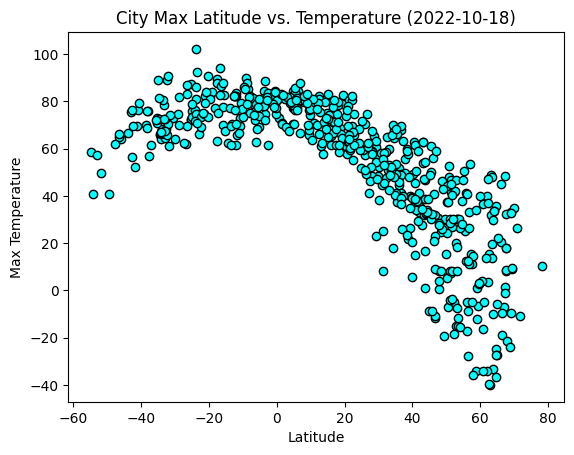

In [17]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']
plt.scatter(latitude, temperature, marker = 'o', facecolors = 'cyan', edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# # Save the figure
# plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

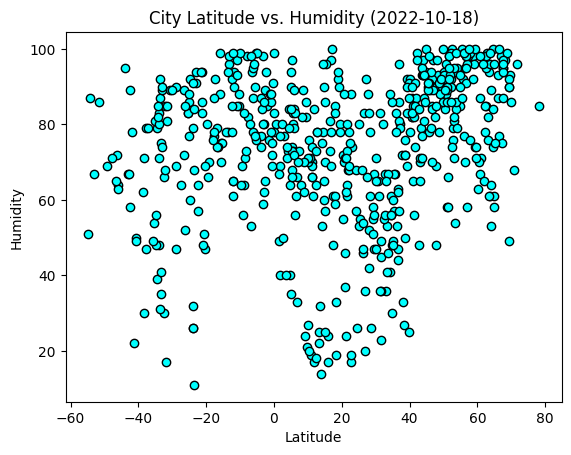

In [18]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']
plt.scatter(latitude, humidity, marker = 'o', facecolors = 'cyan', edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# # Save the figure
# plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

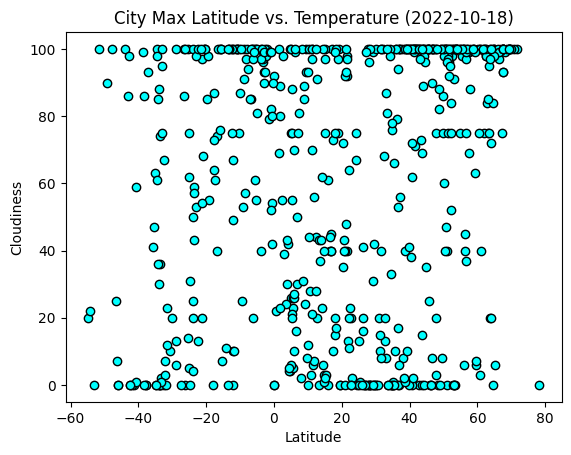

In [19]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']
plt.scatter(latitude, cloudiness, marker = 'o', facecolors = 'cyan', edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# # Save the figure
# plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

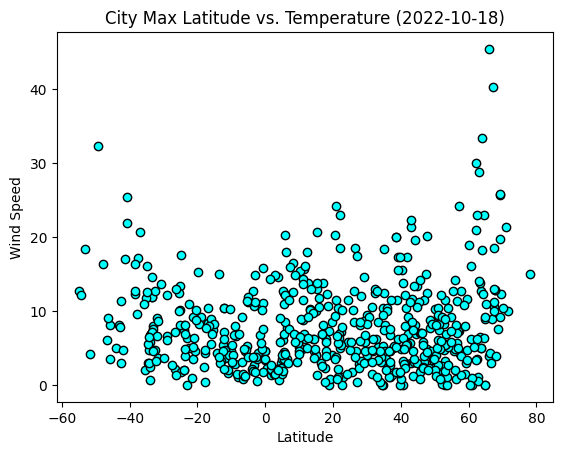

In [20]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df['Wind Speed']
plt.scatter(latitude, wind_speed, marker = 'o', facecolors = 'cyan', edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# # Save the figure
# plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots
def scatter_plots(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, marker = 'o', facecolors = 'cyan', edgecolors = 'black')
    plt.plot(x, regress_values, "r-")
    plt.xlabel('Latitude')


In [61]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat'] >= 0), :])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,preobrazheniye,42.9019,133.9064,27.50,48,0,3.00,RU,1706493671
6,kuala kangsar,4.7667,100.9333,84.52,64,4,2.91,MY,1706493672
7,erenhot,43.6475,111.9767,0.97,93,15,7.65,CN,1706493672
8,bethel,41.3712,-73.4140,36.36,86,100,3.00,US,1706493672
9,camarinas,43.1311,-9.1817,62.92,70,100,21.34,ES,1706493673


In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat'] <= 0), :])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,acarau,-2.8856,-40.1200,82.04,80,93,14.81,BR,1706493668
1,ushuaia,-54.8000,-68.3000,58.66,51,20,12.66,AR,1706493669
2,callao,-12.0667,-77.1500,83.71,65,0,10.36,PE,1706493627
4,dunedin,-45.8742,170.5036,65.25,64,0,8.05,NZ,1706493671
5,port mathurin,-19.6833,63.4167,82.11,80,85,15.28,MU,1706493665


###  Temperature vs. Latitude Linear Regression Plot

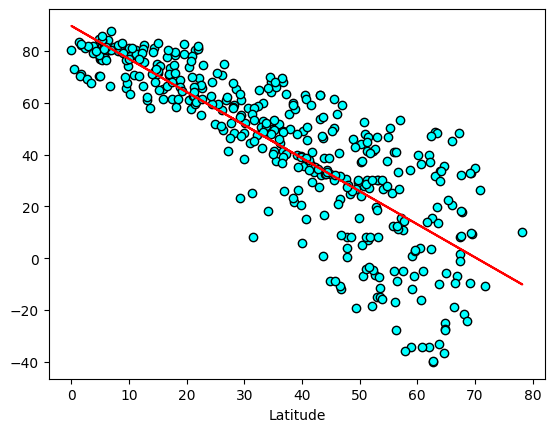

In [63]:
# Linear regression on Northern Hemisphere
northern_latitude = northern_hemi_df['Lat']
northern_temperature = northern_hemi_df['Max Temp']

scatter_plots(northern_latitude, northern_temperature)
plt.show()

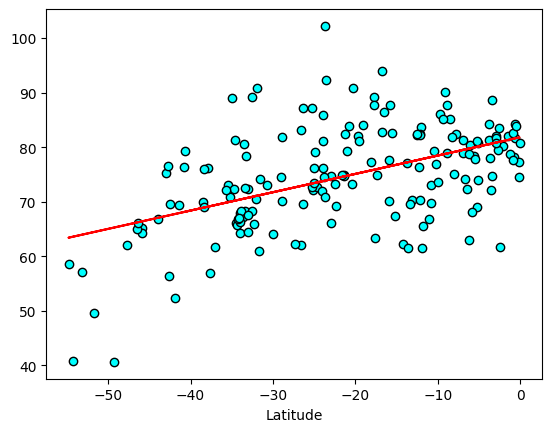

In [64]:
# Linear regression on Southern Hemisphere
southern_latitude = southern_hemi_df['Lat']
southern_temperature = southern_hemi_df['Max Temp']

scatter_plots(southern_latitude, southern_temperature)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

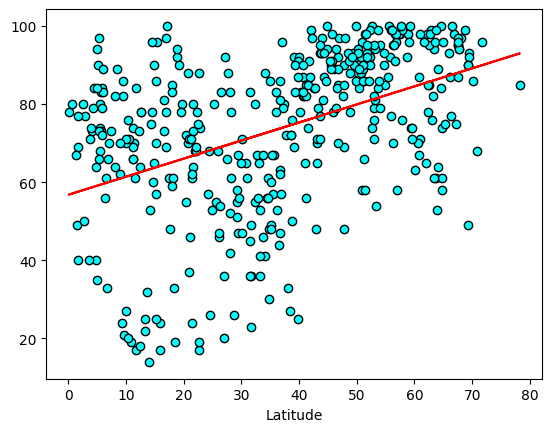

In [65]:
# Northern Hemisphere
northern_humidity = northern_hemi_df['Humidity']

scatter_plots(northern_latitude, northern_humidity)
plt.show()

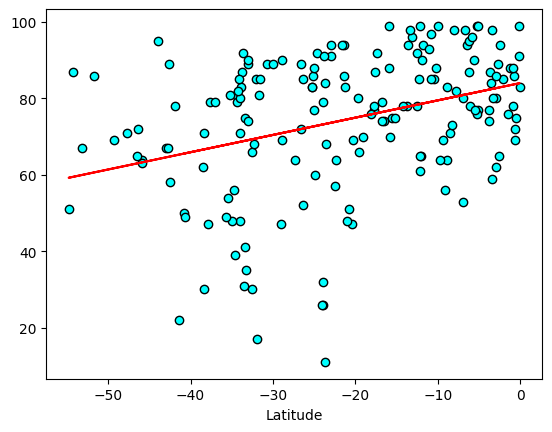

In [66]:
# Southern Hemisphere
southern_humidity = southern_hemi_df['Humidity']

scatter_plots(southern_latitude, southern_humidity)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

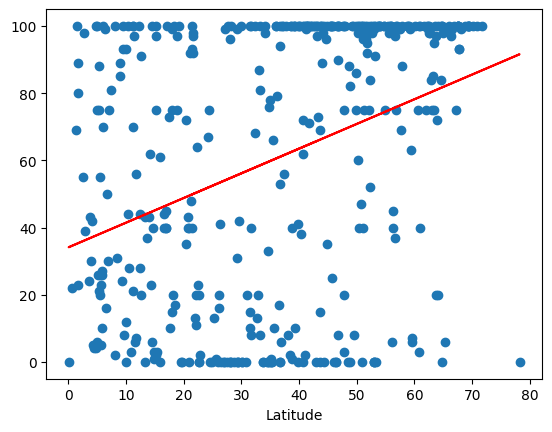

In [56]:
# Northern Hemisphere
northern_cloudiness = northern_hemi_df['Cloudiness']

scatter_plots(northern_latitude, northern_cloudiness)
plt.show()

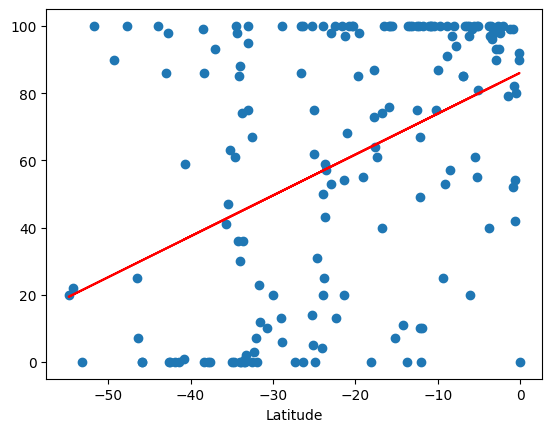

In [57]:
# Southern Hemisphere
southern_cloudiness = southern_hemi_df['Cloudiness']

scatter_plots(southern_latitude, southern_cloudiness)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

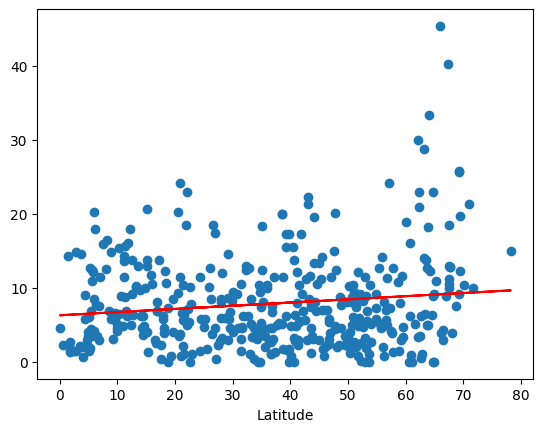

In [58]:
# Northern Hemisphere
northern_wind_speed = northern_hemi_df['Wind Speed']

scatter_plots(northern_latitude, northern_wind_speed)
plt.show()

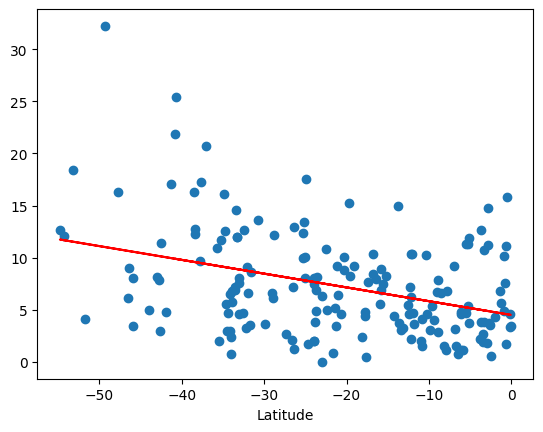

In [59]:
# Southern Hemisphere
southern_wind_speed = southern_hemi_df['Wind Speed']

scatter_plots(southern_latitude, southern_wind_speed)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE